## <font color="maroon"><h4 align="center">Pandas Group By</font>

**In this tutorial we are going to look at weather data from various cities and see how group by can be used to run some analytics.** 

In [38]:
import pandas as pd
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?


In [39]:
g = df.groupby("city")
g

**DataFrameGroupBy object looks something like below,**

<img src="group_by_cities.png">

In [40]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)    

city: mumbai


data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


**This is similar to SQL,**

**SELECT * from weather_data GROUP BY city**

In [41]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [45]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [46]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


**This method of splitting your dataset in smaller groups and then applying an operation 
(such as min or max) to get aggregate result is called Split-Apply-Combine. It is illustrated in a diagram below**

<img src="split_apply_combine.png">

In [44]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [48]:
g.describe()

temperature  windspeed
city                                  
mumbai   count     4.000000   4.000000
         mean     88.500000   9.250000
         std       3.109126   5.057997
         min      85.000000   5.000000
         25%      86.500000   5.000000
         50%      88.500000   8.500000
         75%      90.500000  12.750000
         max      92.000000  15.000000
new york count     4.000000   4.000000
         mean     32.250000   8.000000
         std       3.304038   2.708013
         min      28.000000   6.000000
         25%      31.000000   6.750000
         50%      32.500000   7.000000
         75%      33.750000   8.250000
         max      36.000000  12.000000
paris    count     4.000000   4.000000
         mean     47.750000  12.750000
         std       5.315073   5.251984
         min      42.000000   8.000000
         25%      44.250000   9.500000
         50%      47.500000  11.500000
         75%      51.000000  14.750000
         max      54.000000  20.000000

In [43]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [42]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      Axes(0.125,0.125;0.775x0.775)
new york    Axes(0.125,0.125;0.775x0.775)
paris       Axes(0.125,0.125;0.775x0.775)
dtype: object

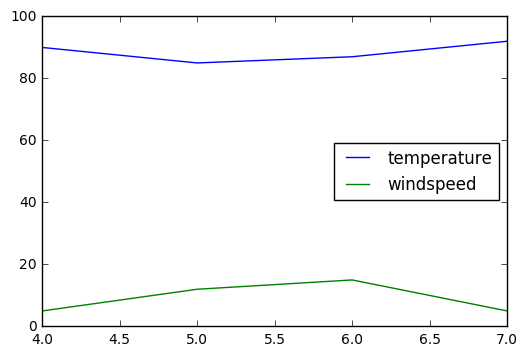

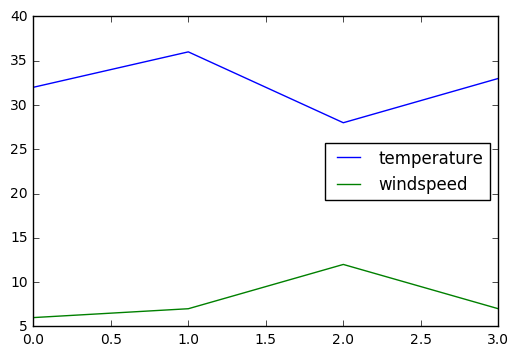

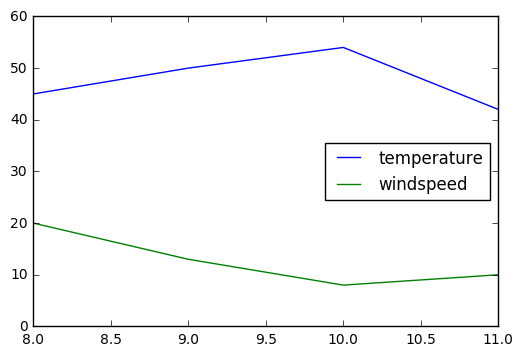

In [47]:
%matplotlib inline
g.plot()